In [1]:
from arpes.io import load_data
import os.path

C:\Users\hellbrue\Documents\Repositories\pyarpes\arpes\config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs\unnamed_2022-09-26_15-14-34.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


# Quick overview of Bi2212 Data from 2nd Beamtime at PSI
This notebook covers a basic overview of the Bi2212 data taken at the 2nd beamtime at PSI. It will show the observed EDCs of Bi2212 and Gold and the FS of Bi2212.
The Gold measurements were taken to have a reference for the Fermi Level of all Data taken on this beamtime.

## EDC of Bi2212 at normal emission

In [2]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Beamtime2\Sample4\Bi2212")

# Different parameters used to set up scans at SLS
scan_type = 'EDC'
direction = '*'
phi = '*'
energy = '*'+'eV'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = ''
run = '*'.zfill(4)

# Put together string for finding file
phi = phi.replace('+', 'P').replace('-', 'M').replace('.', 'p')
energy = energy.replace('.', 'p')
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'EDC_*_*_*eV_*_*_*eVpass_000*.h5'

In [3]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

1


['G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2212\\EDC_AN_M31_27eV_CIRCP_LT_20eVpass_0000.h5']

In [4]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

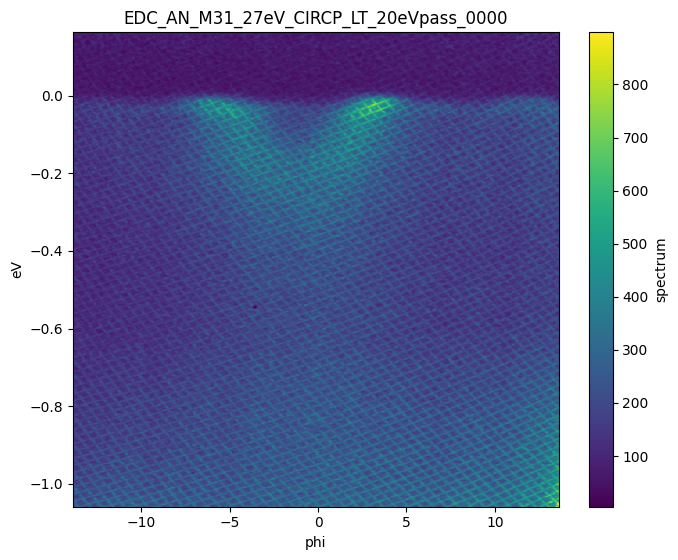

In [5]:
import matplotlib.pyplot as plt
import math
rows = math.ceil(len(data_list) / 3)
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
    
for key in data_list.keys():
    data_list[key].spectrum.S.plot()
    ax.set_title(f"{key}")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

## EDCs of Bi2212 at different Tilts

In [6]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Beamtime2\Sample4\Bi2212")

# Different parameters used to set up scans at SLS
scan_type = 'EDC'
direction = '*'
phi = '*'
energy = '*'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = 'TILT*'
run = '*'.zfill(4)

# Put together string for finding file
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'EDC_*_*_*_*_*_*eVpass_TILT*_000*.h5'

In [7]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

2


['G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2212\\EDC_AN_M31_27eV_CIRCP_LT_20eVpass_TILTM4_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2212\\EDC_AN_M31_27eV_CIRCP_LT_20eVpass_TILTM2_0000.h5']

In [8]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

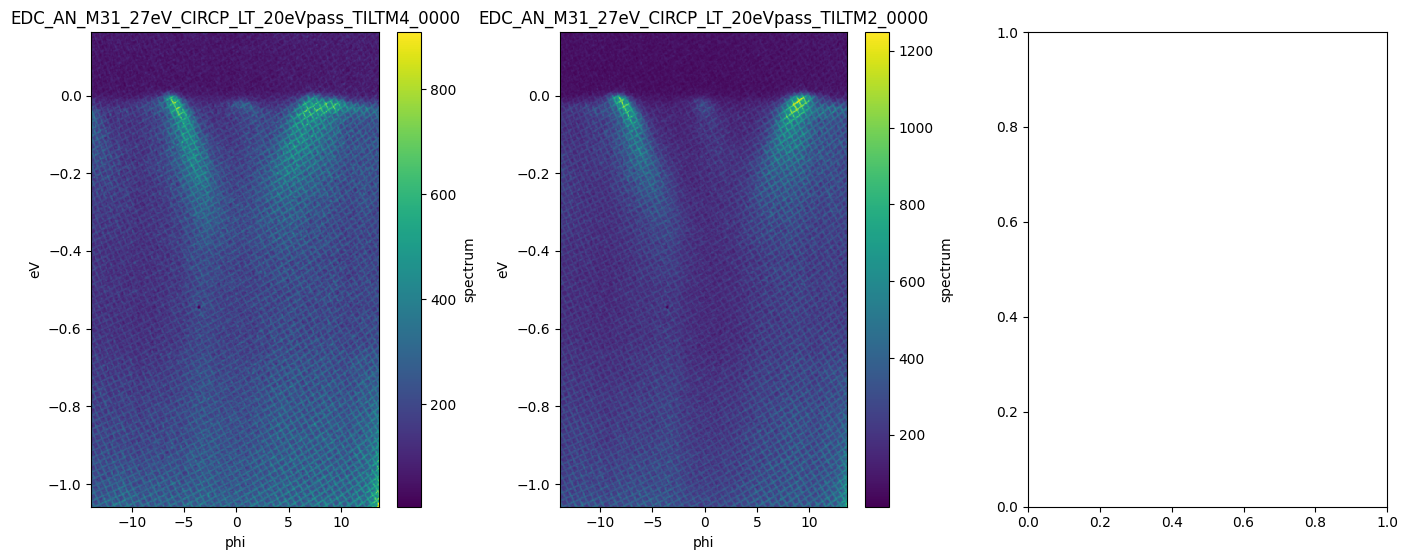

In [9]:
import matplotlib.pyplot as plt
import math
rows = math.ceil(len(data_list) / 3)
fig, ax = plt.subplots(rows, 3, figsize=(14, 6*rows))
    
for key in data_list.keys():
    data_list[key].spectrum.S.plot(ax=ax.ravel()[list(data_list).index(key)])
    ax.ravel()[list(data_list).index(key)].set_title(f"{key}")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

## EDCs of Gold reference sample

In [10]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Beamtime2\Sample4\Bi2212")

# Different parameters used to set up scans at SLS
scan_type = 'EDC'
direction = '*'
phi = '*'
energy = '*'+'eV'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = 'GoldRef*'
run = '*'.zfill(4)

# Put together string for finding file
phi = phi.replace('+', 'P').replace('-', 'M').replace('.', 'p')
energy = energy.replace('.', 'p')
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'EDC_*_*_*eV_*_*_*eVpass_GoldRef*_000*.h5'

In [11]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

3


['G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2212\\EDC_X_M0_26p5eV_CIRCP_LT_20eVpass_GoldRef 2_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2212\\EDC_X_M0_25eV_CIRCP_LT_20eVpass_GoldRef 3_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2212\\EDC_X_M0_27eV_CIRCP_LT_20eVpass_GoldRef_0000.h5']

In [12]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

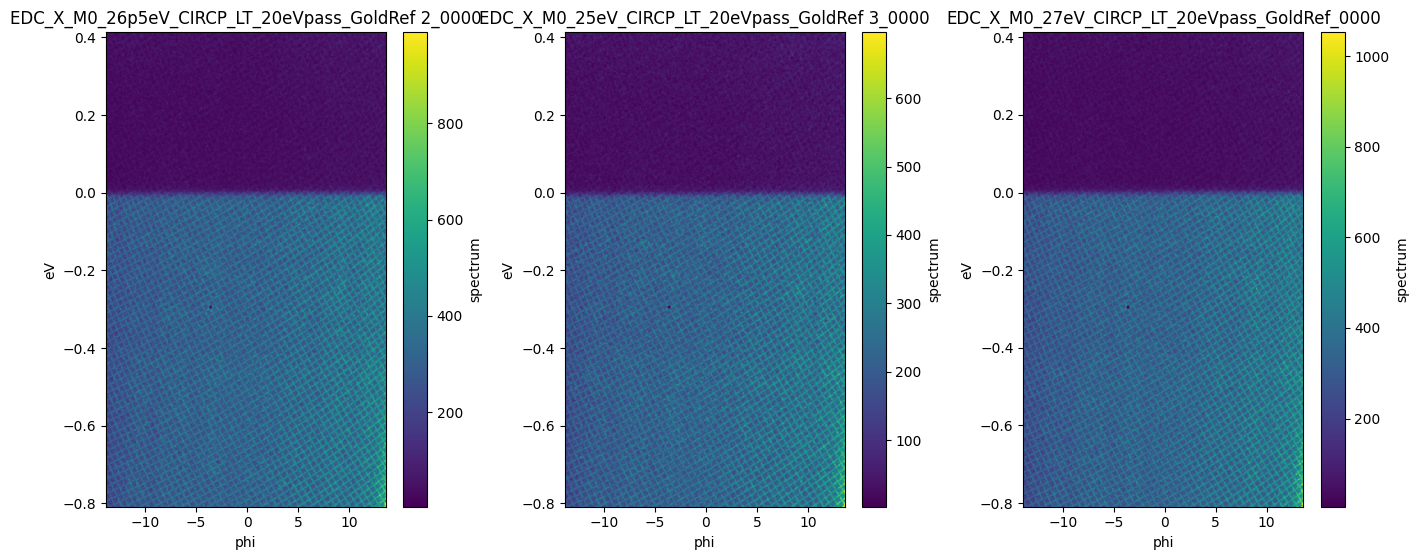

In [13]:
import matplotlib.pyplot as plt
import math
rows = math.ceil(len(data_list) / 3)
fig, ax = plt.subplots(rows, 3, figsize=(14, 6*rows))
    
for key in data_list.keys():
    data_list[key].spectrum.S.plot(ax=ax.ravel()[list(data_list).index(key)])
    ax.ravel()[list(data_list).index(key)].set_title(f"{key}")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

## FS maps of Bi2212

In [14]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Beamtime2\Sample4\Bi2212")

# Different parameters used to set up scans at SLS
scan_type = 'FS'
direction = '*'
phi = '*'
energy = '*'+'eV'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = ''
run = '*'.zfill(4)

# Put together string for finding file
phi = phi.replace('+', 'P').replace('-', 'M').replace('.', 'p')
energy = energy.replace('.', 'p')
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'FS_*_*_*eV_*_*_*eVpass_000*.h5'

In [15]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

6


['G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2212\\FS_N_P18_27eV_CIRCP_LT_20eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2212\\FS_N_M76_27eV_CIRCP_LT_20eVpass_0001.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2212\\FS_N_M76_27eV_CIRCP_LT_20eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2212\\FS_AN_P16p5_25eV_CIRCP_LT_20eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2212\\FS_AN_M31_27eV_CIRCP_LT_20eVpass_0001.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2212\\FS_AN_M31_27eV_CIRCP_LT_20eVpass_0000.h5']

In [16]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

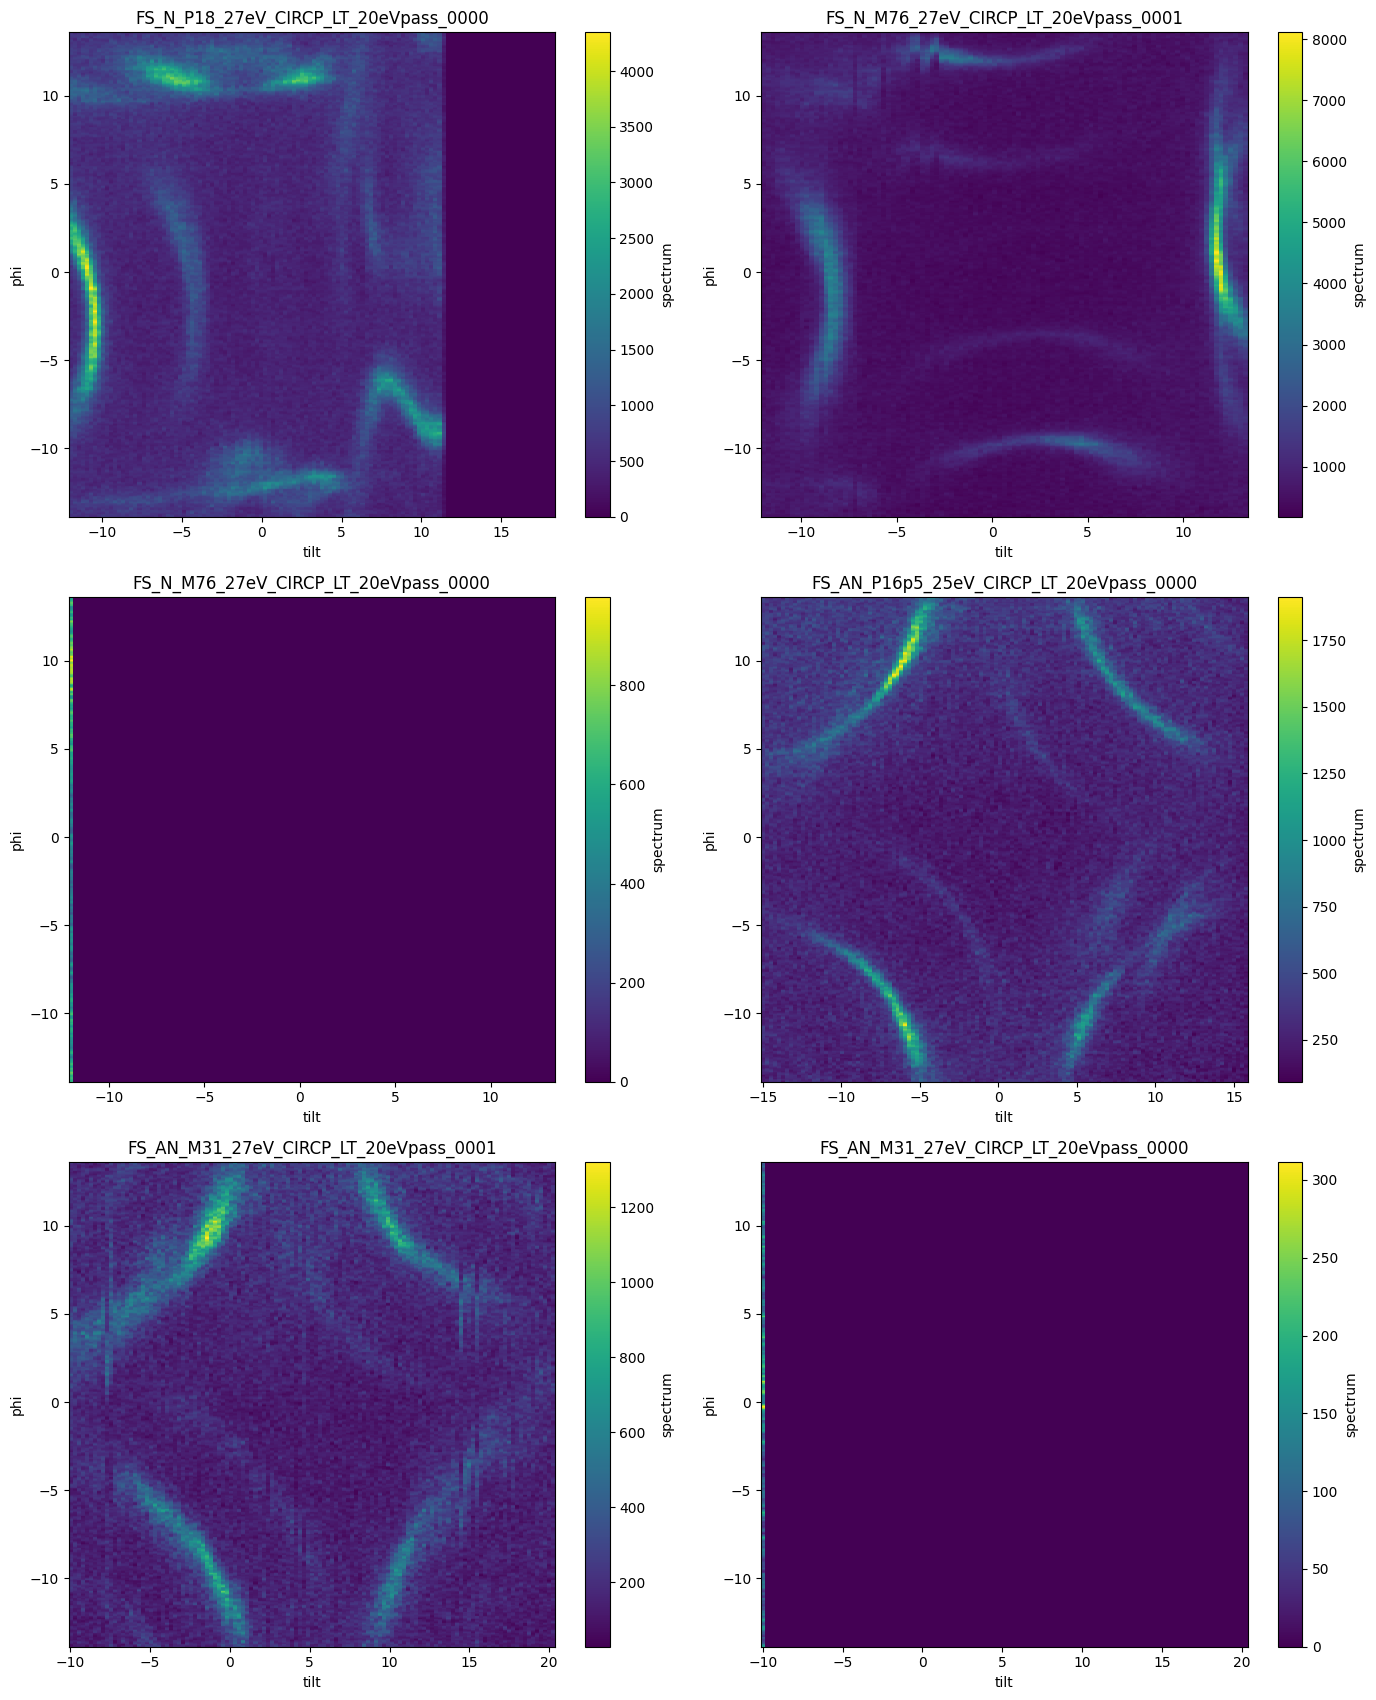

In [17]:
import matplotlib.pyplot as plt
import math
rows = math.ceil(len(data_list) / 2)
fig, ax = plt.subplots(rows, 2, figsize=(14, 6*rows))
    
for key in data_list.keys():
    data = data_list[key].spectrum
    fs = data.sel(eV=slice(-0.02,0.02)).sum("eV")
    fs.plot(ax=ax.ravel()[list(data_list).index(key)])
    ax.ravel()[list(data_list).index(key)].set_title(f"{key}")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])